# EDA

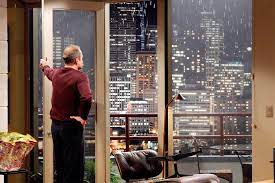

In [23]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

#### Client:
* Erin Robinson
* Socially responsible -> will buy cheap houses, renovate and sell with costs back and small profit.
<br>

#### Hypotheses: 
* there are cheaper houses/apartments in neighbourhoods with lower household income. 
--> Look at heatmap (household income) and check against zip code and data (price, grade, sqft_lot)
* Cheaper houses/apartments clustered in areas where people with a migration background are living (e.g. Seattle China Town).
--> check zip code and prices for Seattle, what are the outliers (Chinatown?)
* Areas that are more rural tend to have cheaper houses/apartments. 
--> check zip codes and house prices, sqft_lot
<br>

In [25]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [30]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()
# no duplicates

False    21597
dtype: int64

In [31]:
df.dtypes

id               int64  
date             object 
price            float64
bedrooms         int64  
bathrooms        float64
sqft_living      int64  
sqft_lot         int64  
floors           float64
waterfront       float64
view             float64
condition        int64  
grade            int64  
sqft_above       int64  
sqft_basement    object 
yr_built         int64  
yr_renovated     float64
zipcode          int64  
lat              float64
long             float64
sqft_living15    int64  
sqft_lot15       int64  
dtype: object

In [32]:
# Drop the ID column:
df = df.drop('id', axis=1)

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [34]:
df[['price', 'zipcode', 'grade']].head(10)
# grade 11 better than grade 7 if you look at prices

,price,zipcode,grade
0,221900.000,98178,7
1,538000.000,98125,7
2,180000.000,98028,6
3,604000.000,98136,7
4,510000.000,98074,8
5,1230000.000,98053,11
6,257500.000,98003,7
7,291850.000,98198,7
8,229500.000,98146,7
9,323000.000,98038,7


In [35]:
df['grade'].unique()
# grades range from 3 (low) to 13 (high)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [36]:
df.groupby('grade').describe()

price                                                              \
         count        mean         std         min         25%         50%   
grade                                                                        
3     1.000    262000.000  NaN         262000.000  262000.000  262000.000    
4     27.000   212001.852  97294.498   80000.000   142500.000  200000.000    
5     242.000  248523.971  118100.280  78000.000   175000.000  228700.000    
6     2038.000 301916.571  122952.248  82000.000   215037.500  275276.500    
7     8974.000 402594.573  155728.547  90000.000   285000.000  375000.000    
8     6065.000 542986.800  217627.956  140000.000  390000.000  510000.000    
9     2615.000 773738.222  316522.125  230000.000  571500.000  720000.000    
10    1134.000 1072347.467 484050.810  316000.000  768087.500  914327.000    
11    399.000  1497792.378 705127.364  420000.000  1040000.000 1280000.000   
12    89.000   2202528.090 1028718.069 835000.000  1500000.000 1820000.000   
13    13.000   3710769.231 1859545.023 1780000.000 2420000.000 2980000.000   

                              bedrooms                                      \
              75%         max    count  mean   std   min   25%   50%   75%   
grade                                                                        
3     262000.000  262000.000  1.000    1.000 NaN   1.000 1.000 1.000 1.000   
4     273500.000  435000.000  27.000   1.593 0.572 1.000 1.000 2.000 2.000   
5     295750.000  795000.000  242.000  2.388 0.997 1.000 2.000 2.000 3.000   
6     366837.500  1200000.000 2038.000 2.686 0.832 1.000 2.000 3.000 3.000   
7     485000.000  2050000.000 8974.000 3.258 0.909 1.000 3.000 3.000 4.000   
8     640000.000  3070000.000 6065.000 3.482 0.842 1.000 3.000 3.000 4.000   
9     880000.000  2700000.000 2615.000 3.773 0.773 1.000 3.000 4.000 4.000   
10    1250000.000 3600000.000 1134.000 3.907 0.787 1.000 3.000 4.000 4.000   
11    1700000.000 7060000.000 399.000  4.160 0.798 2.000 4.000 4.000 5.000   
12    2700000.000 5350000.000 89.000   4.270 0.902 2.000 4.000 4.000 5.000   
13    3800000.000 7700000.000 13.000   4.846 0.899 3.000 4.000 5.000 5.000   

             bathrooms                                           sqft_living  \
         max     count  mean   std   min   25%   50%   75%   max       count   
grade                                                                          
3     1.000  1.000     0.750 NaN   0.750 0.750 0.750 0.750 0.750 1.000         
4     3.000  27.000    0.907 0.210 0.750 0.750 1.000 1.000 1.750 27.000        
5     6.000  242.000   1.114 0.339 0.500 1.000 1.000 1.000 2.750 242.000       
6     7.000  2038.000  1.243 0.426 0.500 1.000 1.000 1.500 3.750 2038.000      
7     33.000 8974.000  1.830 0.615 0.750 1.500 1.750 2.250 7.500 8974.000      
8     9.000  6065.000  2.349 0.526 0.500 2.000 2.500 2.500 6.000 6065.000      
9     10.000 2615.000  2.664 0.501 1.000 2.500 2.500 2.750 5.250 2615.000      
10    8.000  1134.000  3.006 0.640 1.500 2.500 2.750 3.500 5.500 1134.000      
11    9.000  399.000   3.502 0.802 1.250 3.000 3.500 4.000 6.750 399.000       
12    8.000  89.000    4.025 1.088 2.500 3.250 3.750 4.500 8.000 89.000        
13    6.000  13.000    5.096 1.622 2.500 4.000 5.000 5.750 8.000 13.000        

                                                                       \
          mean      std      min      25%      50%      75%       max   
grade                                                                   
3     520.000  NaN      520.000  520.000  520.000  520.000  520.000     
4     680.741  224.721  410.000  525.000  700.000  765.000  1470.000    
5     983.326  359.772  370.000  720.000  905.000  1167.500 2040.000    
6     1191.561 396.783  390.000  900.000  1120.000 1397.500 3900.000    
7     1689.515 509.939  550.000  1320.000 1630.000 1990.000 4480.000    
8     2184.804 595.964  750.000  1760.000 2150.000 2550.000 5370.000    
9     2868.140 664.151  860.000  2440.000 282

In [37]:
df.groupby('grade').count()

# why is the mean bigger in grade 3 than grade 4 and grade 5?

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,27,27,27,27,27,27,27,25,27,27,27,27,27,18,27,27,27,27,27
5,242,242,242,242,242,242,242,212,242,242,242,242,242,190,242,242,242,242,242
6,2038,2038,2038,2038,2038,2038,2038,1810,2031,2038,2038,2038,2038,1681,2038,2038,2038,2038,2038
7,8974,8974,8974,8974,8974,8974,8974,7974,8948,8974,8974,8974,8974,7362,8974,8974,8974,8974,8974
8,6065,6065,6065,6065,6065,6065,6065,5409,6053,6065,6065,6065,6065,4985,6065,6065,6065,6065,6065
9,2615,2615,2615,2615,2615,2615,2615,2320,2604,2615,2615,2615,2615,2176,2615,2615,2615,2615,2615
10,1134,1134,1134,1134,1134,1134,1134,1018,1130,1134,1134,1134,1134,933,1134,1134,1134,1134,1134
11,399,399,399,399,399,399,399,357,397,399,399,399,399,326,399,399,399,399,399


In [38]:
# what is mean price per grade?
df.groupby('grade').mean()['price']

grade
3    262000.000 
4    212001.852 
5    248523.971 
6    301916.571 
7    402594.573 
8    542986.800 
9    773738.222 
10   1072347.467
11   1497792.378
12   2202528.090
13   3710769.231
Name: price, dtype: float64